In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
cnt =0 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        cnt+=1
        if cnt >6:
            break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-sign-detection/annotations/road732.xml
/kaggle/input/road-sign-detection/annotations/road518.xml
/kaggle/input/road-sign-detection/annotations/road717.xml
/kaggle/input/road-sign-detection/annotations/road362.xml
/kaggle/input/road-sign-detection/annotations/road492.xml
/kaggle/input/road-sign-detection/annotations/road612.xml
/kaggle/input/road-sign-detection/annotations/road252.xml
/kaggle/input/road-sign-detection/images/road348.png


# Data Exploration

In [74]:
import os
cnt =0 
for dirname, _, filenames in os.walk('/kaggle/input/road-sign-detection/images/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        cnt+=1
print ('images count',cnt)

images count 877


In [75]:
import os
cnt =0 
for dirname, _, filenames in os.walk('/kaggle/input/road-sign-detection/annotations/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        cnt+=1
print ('annotations count',cnt)

annotations count 877


In [76]:
import xml.etree.ElementTree as ET
# refer https://docs.python.org/3/library/xml.etree.elementtree.html

sample_annotation = "/kaggle/input/road-sign-detection/annotations/road732.xml"

root = ET.parse(sample_annotation).getroot()
for r in root:
    print (r)
    

<Element 'folder' at 0x7ff57fa186b0>
<Element 'filename' at 0x7ff57fa18710>
<Element 'size' at 0x7ff57fa18830>
<Element 'segmented' at 0x7ff57fa18a10>
<Element 'object' at 0x7ff57fa18a70>
<Element 'object' at 0x7ff57fa18fb0>


In [77]:
import xml.etree.ElementTree as ET

sample_annotation = "/kaggle/input/road-sign-detection/annotations/road732.xml"
#sample_annotation = "/kaggle/input/road-sign-detection/annotations/road518.xml"

root = ET.parse(sample_annotation).getroot()
filename= root.find('./filename').text
print ('filename',filename)
height = root.find("./size/height").text
print ('height',height)
width = root.find("./size/width").text
print ('width',width)
object_class = root.find("./object/name").text
print ('object_class',object_class)
bounding_box= root.find("./object/bndbox")
xmin = int(root.find("./object/bndbox/xmin").text)
print ('xmin',xmin)
xmax = int(root.find("./object/bndbox/xmax").text)
print ('xmax',xmax)
ymin = int(root.find("./object/bndbox/ymin").text)
print ('ymin',ymin)
ymax = int(root.find("./object/bndbox/ymax").text)
print ('ymax',ymax)


filename road732.png
height 400
width 300
object_class speedlimit
xmin 99
xmax 159
ymin 97
ymax 157


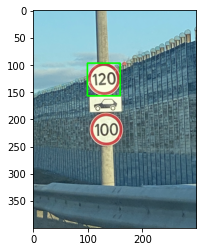

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt

import cv2
image_path = "/kaggle/input/road-sign-detection/images/"
file_path = image_path+filename
#print ('file_path',file_path)
image = cv2.imread(file_path)
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
orig_image=np.copy(image)
cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),2)
plt.imshow(image)
plt.show()

# resize image and bounding box using scale factor

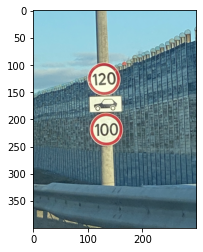

1.0 0.75


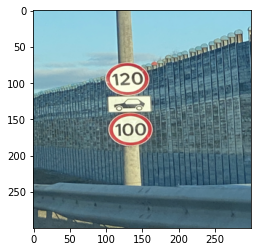

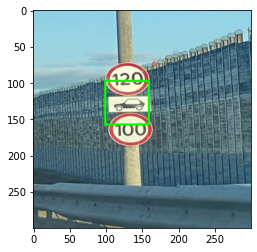

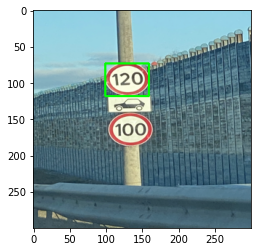

In [79]:
plt.imshow(orig_image)
plt.show()
targetSize = 300
x_scale = targetSize / int(width)
y_scale = targetSize / int(height)
print(x_scale, y_scale)
img = cv2.resize(orig_image, (targetSize, targetSize))
plt.imshow(img)
plt.show()
resized_image_copy=np.copy(img)
cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),2)
plt.imshow(img)
plt.show()


# original frame as named values
(origLeft, origTop, origRight, origBottom) = (xmin, ymin, xmax, ymax)

x = int(np.round(origLeft * x_scale))
y = int(np.round(origTop * y_scale))
xmax1 = int(np.round(origRight * x_scale))
ymax1 = int(np.round(origBottom * y_scale))

cv2.rectangle(resized_image_copy,(x,y),(xmax1,ymax1),(0,255,0),2)
plt.imshow(resized_image_copy)
plt.show()

filename road13.png
height 400
width 267
object_class trafficlight
xmin 75
xmax 195
ymin 74
ymax 348


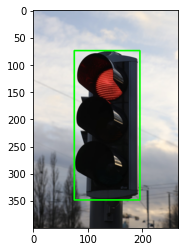

In [80]:
import xml.etree.ElementTree as ET

import numpy as np

sample_annotation = "/kaggle/input/road-sign-detection/annotations/road492.xml"
sample_annotation = "/kaggle/input/road-sign-detection/annotations/road13.xml"

root = ET.parse(sample_annotation).getroot()
filename= root.find('./filename').text
print ('filename',filename)
height = root.find("./size/height").text
print ('height',height)
width = root.find("./size/width").text
print ('width',width)
object_class = root.find("./object/name").text
print ('object_class',object_class)
bounding_box= root.find("./object/bndbox")
xmin = int(root.find("./object/bndbox/xmin").text)
print ('xmin',xmin)
xmax = int(root.find("./object/bndbox/xmax").text)
print ('xmax',xmax)
ymin = int(root.find("./object/bndbox/ymin").text)
print ('ymin',ymin)
ymax = int(root.find("./object/bndbox/ymax").text)
print ('ymax',ymax)

%matplotlib inline
import matplotlib.pyplot as plt

import cv2
image_path = "/kaggle/input/road-sign-detection/images/"
file_path = image_path+filename
#print ('file_path',file_path)
image = cv2.imread(file_path)
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
orig_image=np.copy(image)
cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),2)
#plt.imshow(bbox)
plt.imshow(image)
plt.show()

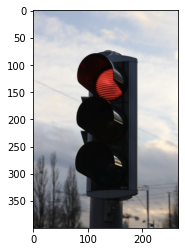

0.9363295880149812 0.625


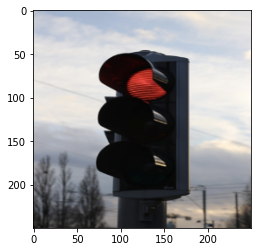

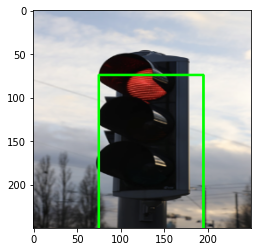

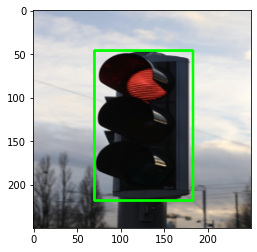

In [81]:
plt.imshow(orig_image)
plt.show()
targetSize = 250
x_scale = targetSize / int(width)
y_scale = targetSize / int(height)
print(x_scale, y_scale)
img = cv2.resize(orig_image, (targetSize, targetSize))
plt.imshow(img)
plt.show()
resized_image_copy=np.copy(img)
cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),2)
plt.imshow(img)
plt.show()


# original frame as named values
(origLeft, origTop, origRight, origBottom) = (xmin, ymin, xmax, ymax)

xmin_new = int(np.round(origLeft * x_scale))
ymin_new = int(np.round(origTop * y_scale))
xmax_new = int(np.round(origRight * x_scale))
ymax_new = int(np.round(origBottom * y_scale))

cv2.rectangle(resized_image_copy,(xmin_new,ymin_new),(xmax_new,ymax_new),(0,255,0),2)
plt.imshow(resized_image_copy)
plt.show()

filename road492.png
height 400
width 300
object_class speedlimit
xmin 110
xmax 182
ymin 137
ymax 208


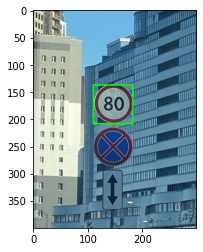

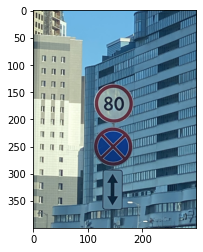

0.8333333333333334 0.625


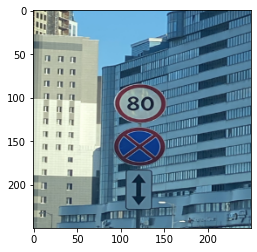

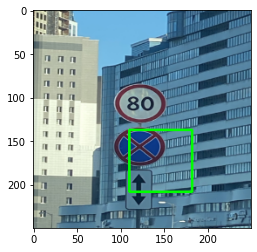

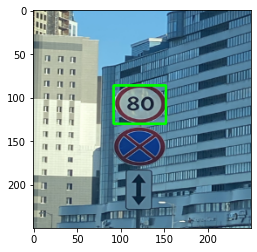

In [82]:
import xml.etree.ElementTree as ET

import numpy as np

sample_annotation = "/kaggle/input/road-sign-detection/annotations/road492.xml"
#sample_annotation = "/kaggle/input/road-sign-detection/annotations/road13.xml"

root = ET.parse(sample_annotation).getroot()
filename= root.find('./filename').text
print ('filename',filename)
height = root.find("./size/height").text
print ('height',height)
width = root.find("./size/width").text
print ('width',width)
object_class = root.find("./object/name").text
print ('object_class',object_class)
bounding_box= root.find("./object/bndbox")
xmin = int(root.find("./object/bndbox/xmin").text)
print ('xmin',xmin)
xmax = int(root.find("./object/bndbox/xmax").text)
print ('xmax',xmax)
ymin = int(root.find("./object/bndbox/ymin").text)
print ('ymin',ymin)
ymax = int(root.find("./object/bndbox/ymax").text)
print ('ymax',ymax)

%matplotlib inline
import matplotlib.pyplot as plt

import cv2
image_path = "/kaggle/input/road-sign-detection/images/"
file_path = image_path+filename
#print ('file_path',file_path)
image = cv2.imread(file_path)
image= cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
orig_image=np.copy(image)
cv2.rectangle(image,(xmin,ymin),(xmax,ymax),(0,255,0),2)
#plt.imshow(bbox)
plt.imshow(image)
plt.show()

plt.imshow(orig_image)
plt.show()
targetSize = 250
x_scale = targetSize / int(width)
y_scale = targetSize / int(height)
print(x_scale, y_scale)
img = cv2.resize(orig_image, (targetSize, targetSize))
plt.imshow(img)
plt.show()
resized_image_copy=np.copy(img)
cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),2)
plt.imshow(img)
plt.show()


# original frame as named values
(origLeft, origTop, origRight, origBottom) = (xmin, ymin, xmax, ymax)

xmin_new = int(np.round(origLeft * x_scale))
ymin_new = int(np.round(origTop * y_scale))
xmax_new = int(np.round(origRight * x_scale))
ymax_new = int(np.round(origBottom * y_scale))

cv2.rectangle(resized_image_copy,(xmin_new,ymin_new),(xmax_new,ymax_new),(0,255,0),2)
plt.imshow(resized_image_copy)
plt.show()

In [83]:
resized_image_copy.shape

(250, 250, 3)

# Write data in csv format

In [84]:
import os
import xml.etree.ElementTree as ET

cnt =0 

class_label_dict = {'trafficlight':'0',
'stop':'1',
'speedlimit':'2',
'crosswalk':'3'
                   }

#os.mkdir('/kaggle/working/image_annotations/')

if not os.path.exists('/kaggle/working/image_annotations/'):
    os.mkdir('/kaggle/working/image_annotations/')


         
image_annotations_csv = '/kaggle/working/image_annotations/image_annotations.csv'

if os.path.exists(image_annotations_csv):
    os.remove(image_annotations_csv)

f = open(image_annotations_csv,'w')

write_header_str = f"filename,height,width,object_class_label,xmin,ymin,xmax,ymax"
f.write(write_header_str)
f.write('\n')


for dirname, _, filenames in os.walk('/kaggle/input/road-sign-detection/annotations/'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        full_path = os.path.join(dirname, filename)
        
        root = ET.parse(full_path).getroot()
        filename= root.find('./filename').text
        print ('filename',filename)
        height = root.find("./size/height").text
        print ('height',height)
        width = root.find("./size/width").text
        print ('width',width)
        object_class = root.find("./object/name").text
        print ('object_class',object_class)
        object_class_label=  class_label_dict[object_class]
        print ('object_class_label',object_class_label)
        bounding_box= root.find("./object/bndbox")
        xmin = int(root.find("./object/bndbox/xmin").text)
        print ('xmin',xmin)
        ymin = int(root.find("./object/bndbox/ymin").text)
        print ('ymin',ymin)
        xmax = int(root.find("./object/bndbox/xmax").text)
        print ('xmax',xmax)
        ymax = int(root.find("./object/bndbox/ymax").text)
        print ('ymax',ymax)
        
        #write_str=filename + ',' + height + ',' + width + ',' + object_class_label + ',' + xmin + ',' + ymin + ',' + xmax + ',' + ymax + '\n'
        
        write_str = f"{filename},{height},{width},{object_class_label},{xmin},{ymin},{xmax},{ymax}"
        f.write(write_str)
        f.write('\n')
        
        
        cnt+=1
        if cnt > 900:
            break
print ('annotations count',cnt)

f.close()

filename road732.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 99
ymin 97
xmax 159
ymax 157
filename road518.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 157
ymin 165
xmax 184
ymax 191
filename road717.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 90
ymin 219
xmax 109
ymax 240
filename road362.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 82
ymin 164
xmax 151
ymax 232
filename road492.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 110
ymin 137
xmax 182
ymax 208
filename road612.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 91
ymin 246
xmax 164
ymax 325
filename road252.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 165
ymin 203
xmax 180
ymax 218
filename road592.png
height 400
width 300
object_class speedlimit
object_class_label 2
xmin 44
ymin 133
xmax 106
ymax 195
filename road24.png
he

In [85]:
import pandas as pd
image_annotations_df = pd.read_csv(image_annotations_csv)
image_annotations_df.head(10)

,filename,height,width,object_class_label,xmin,ymin,xmax,ymax
0,road732.png,400,300,2,99,97,159,157
1,road518.png,400,300,2,157,165,184,191
2,road717.png,400,300,2,90,219,109,240
3,road362.png,400,300,2,82,164,151,232
4,road492.png,400,300,2,110,137,182,208
5,road612.png,400,300,2,91,246,164,325
6,road252.png,400,300,2,165,203,180,218
7,road592.png,400,300,2,44,133,106,195
8,road24.png,400,267,0,70,174,128,286
9,road841.png,400,300,2,107,144,148,185


# Add resized bounding boxes

In [86]:
targetSize = 250


# # original frame as named values
# (origLeft, origTop, origRight, origBottom) = (xmin, ymin, xmax, ymax)

# xmin_new = int(np.round(origLeft * x_scale))
# ymin_new = int(np.round(origTop * y_scale))
# xmax_new = int(np.round(origRight * x_scale))
# ymax_new = int(np.round(origBottom * y_scale))


def resize_xmin_formula(r):
    x_scale = targetSize / int(r['width'])
    y_scale = targetSize / int(r['height'])
    #print(x_scale, y_scale)
    xmin_new = int(np.round(r['xmin'] * x_scale))
    return xmin_new


def resize_ymin_formula(r):
    x_scale = targetSize / int(r['width'])
    y_scale = targetSize / int(r['height'])
    #print(x_scale, y_scale)
    ymin_new = int(np.round(r['ymin'] * x_scale))
    return ymin_new

def resize_xmax_formula(r):
    x_scale = targetSize / int(r['width'])
    y_scale = targetSize / int(r['height'])
    #print(x_scale, y_scale)
    xmax_new = int(np.round(r['xmax'] * x_scale))
    return xmax_new

def resize_ymax_formula(r):
    x_scale = targetSize / int(r['width'])
    y_scale = targetSize / int(r['height'])
    #print(x_scale, y_scale)
    ymax_new = int(np.round(r['ymax'] * x_scale))
    return ymax_new
    

resized_image_annotations_df = image_annotations_df.copy()


resized_image_annotations_df['xmin_resized'] = image_annotations_df.apply(resize_xmin_formula, axis=1)

resized_image_annotations_df['ymin_resized'] = image_annotations_df.apply(resize_ymin_formula, axis=1)

resized_image_annotations_df['xmax_resized'] = image_annotations_df.apply(resize_xmax_formula, axis=1)

resized_image_annotations_df['ymax_resized'] = image_annotations_df.apply(resize_ymax_formula, axis=1)


resized_image_annotations_df.head(20)

resized_image_annotations_df_with_bb = resized_image_annotations_df.copy()


def collect_coordinates(r):
    bb = [r['xmin_resized'] ,r['ymin_resized'] ,r['xmax_resized'] ,r['ymax_resized'] ]
    return bb

resized_image_annotations_df_with_bb['bounding_boxes'] = resized_image_annotations_df.apply(collect_coordinates, axis=1)

resized_image_annotations_df_with_bb.head(20)


,filename,height,width,object_class_label,xmin,ymin,xmax,ymax,xmin_resized,ymin_resized,xmax_resized,ymax_resized,bounding_boxes
0,road732.png,400,300,2,99,97,159,157,82,81,132,131,"[82, 81, 132, 131]"
1,road518.png,400,300,2,157,165,184,191,131,138,153,159,"[131, 138, 153, 159]"
2,road717.png,400,300,2,90,219,109,240,75,182,91,200,"[75, 182, 91, 200]"
3,road362.png,400,300,2,82,164,151,232,68,137,126,193,"[68, 137, 126, 193]"
4,road492.png,400,300,2,110,137,182,208,92,114,152,173,"[92, 114, 152, 173]"
5,road612.png,400,300,2,91,246,164,325,76,205,137,271,"[76, 205, 137, 271]"
6,road252.png,400,300,2,165,203,180,218,138,169,150,182,"[138, 169, 150, 182]"
7,road592.png,400,300,2,44,133,106,195,37,111,88,162,"[37, 111, 88, 162]"
8,road24.png,400,267,0,70,174,128,286,66,163,120,268,"[66, 163, 120, 268]"
9,road841.png,400,300,2,107,144,148,185,89,120,123,154,"[89, 120, 123, 154]"


In [87]:
# image_path = "/kaggle/input/road-sign-detection/images/"
# img_list = []
# bounding_box_list = []
# label_list = []
    
# for index, row in resized_image_annotations_df.iterrows():
#     #print(row['filename'], row['xmax_resized'])    
    
#     file_path = image_path+row['filename']
#     img = cv2.imread(file_path)
#     resized_img = cv2.resize(img, (targetSize,targetSize))
#     img_list.append(resized_img)
    
#     curr_bounding_box = (row['xmin_resized'],row['ymin_resized'],row['xmax_resized'],row['ymax_resized'])
#     #print ('curr_bounding_box',curr_bounding_box)
#     bounding_box_list.append(curr_bounding_box)


# print ('img_list len ', len(img_list))
# print ('bounding_box_list len ', len(bounding_box_list))

# import numpy as np
# img_list = np.asarray(img_list).astype(np.uint8)

# print (img_list.shape)
# print (type(img_list))

# bounding_box_list = np.asarray(bounding_box_list).astype(np.uint8)

# print (bounding_box_list.shape)
# print (type(bounding_box_list))

# df_from_arr = pd.DataFrame(data=[img_list, bounding_box_list])
# df_from_arr.head()

# ValueError: could not broadcast input array from shape (16,250,250,3) into shape (16,)

In [88]:
x = resized_image_annotations_df_with_bb[['filename','bounding_boxes']]
x.head(20)

,filename,bounding_boxes
0,road732.png,"[82, 81, 132, 131]"
1,road518.png,"[131, 138, 153, 159]"
2,road717.png,"[75, 182, 91, 200]"
3,road362.png,"[68, 137, 126, 193]"
4,road492.png,"[92, 114, 152, 173]"
5,road612.png,"[76, 205, 137, 271]"
6,road252.png,"[138, 169, 150, 182]"
7,road592.png,"[37, 111, 88, 162]"
8,road24.png,"[66, 163, 120, 268]"
9,road841.png,"[89, 120, 123, 154]"


In [89]:
x['bounding_boxes'][0]

[82, 81, 132, 131]

In [90]:
y = resized_image_annotations_df_with_bb['object_class_label']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: object_class_label, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

print ('x_train.shape',x_train.shape)
print ('y_train.shape',y_train.shape)

x_train.shape (613, 2)
y_train.shape (613,)


In [92]:
from torchvision.transforms import transforms

train_img_transforms = transforms.Compose([transforms.ToPILImage() ,
                                           #transforms.RandomHorizontalFlip(p=0.9),
                                           #transforms.RandomVerticalFlip(p=0.9),
                                           #transforms.RandomRotation(degrees=180),
                                           #transforms.CenterCrop(228),
                                           #transforms.RandomAffine(10),
                                           transforms.ToTensor()]
                                         )


In [93]:
from torch.utils.data import Dataset

class object_dataset(Dataset):
    def __init__(self,x, y,transform,test_ind=0):
        self.test_ind= test_ind
        #self.x = x
        self.filename = x['filename']
        self.bounding_boxes = x['bounding_boxes']
        self.y = y
        self.transform =transform
    
    def __len__(self):
        #print ('self.filename',self.filename)
        length = len(self.filename)
        print ('length',length)
        return length
    
    
    def __getitem__(self,idx):
        #print ('idx',idx)
        fname = self.filename.values[idx]
        
        image_path = "/kaggle/input/road-sign-detection/images/"
        file_path = image_path+fname
        #print ('file_path',file_path)
        image = cv2.imread(file_path)
        image = cv2.resize(image, (targetSize, targetSize))
        
        img_data1 = self.transform(image)
        
        #print ('self.bounding_boxes',self.bounding_boxes.values)
        
        bounding_box_data1 = self.bounding_boxes.values[idx]
        
        #print ('bounding_box_data1',bounding_box_data1)
        
        lbl_data = self.y.values[idx]
        
        if test_ind ==0:
            
            return img_data1,np.array(bounding_box_data1),lbl_data
        else:
            return img_data1
        
        #print ('img_data',img_data)
        #lbl_data = self.y[idx]
        #img_data1 = self.transform(img_data)
        
        #if test_ind ==0:
            
            #return img_data1,lbl_data
        #else:
            #return img_data1

In [94]:
test_ind= 0
train_ds = object_dataset(x_train, y_train,train_img_transforms,test_ind)

In [95]:
from torch.utils.data import DataLoader

batch_size= 10

train_data_loader = DataLoader(train_ds,batch_size=batch_size)

In [96]:
data_iter = iter(train_data_loader)
img,bounding_box, label = data_iter.next()

print ('img shape',img.size())
print ('label shape',label.size())
print ('bounding_box shape',bounding_box.size())
print ('bounding_box',bounding_box)

length 613
img shape torch.Size([10, 3, 250, 250])
label shape torch.Size([10])
bounding_box shape torch.Size([10, 4])
bounding_box tensor([[ 56, 115,  78, 137],
        [122, 155, 153, 186],
        [115, 142, 145, 172],
        [ 96,  91, 148, 144],
        [ 61, 159, 104, 202],
        [122,  82, 161, 122],
        [ 96, 106, 121, 129],
        [ 65, 178,  82, 195],
        [118, 106, 201, 188],
        [133, 159, 155, 181]])


In [97]:
img[0].size()

torch.Size([3, 250, 250])

In [98]:
img[1].size()

torch.Size([3, 250, 250])

# Network

In [99]:
import torch.nn  as nn
import torch.nn.functional as F

class object_net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3,32,5)
        self.pool1 = nn.MaxPool2d(2,2)
                
        self.conv2 = nn.Conv2d(32,64,5)
        self.pool2 = nn.MaxPool2d(2,2)
        
        self.fc1 = nn.Linear(64 * 59*59, 1000)
        self.fc2 = nn.Linear(1000,4)
        
        self.bb = nn.Sequential(nn.BatchNorm1d(1000), nn.Linear(1000, 4))
        #self.bb = nn.Sequential( nn.Linear(64 * 59*59, 1000), nn.Linear(1000, 4))
        
    def forward(self,x):
        conv1_x = F.relu(self.conv1(x))
        pool1_x = self.pool1(conv1_x)
        
        conv2_x = F.relu(self.conv2(pool1_x))
        pool2_x = self.pool2(conv2_x)
        
        #print ('pool2_x shape',pool2_x.size())
        
        flat_x = pool2_x.view(pool2_x.shape[0],-1)
        
        #print ('flat_x shape',flat_x.size())
        
        fc1_x =  F.relu(self.fc1(flat_x))
        fc2_x = self.fc2 (fc1_x)
        
        #bb_x= self.bb(x)
        bb_x= self.bb(fc1_x)
        #bb_x= self.bb(flat_x)
        
        return fc2_x,bb_x
        
        
        

In [100]:
object_model = object_net()
image_class, bounding_box = object_model(img)
print ('image_class',image_class )
print ('bounding_box',bounding_box )
max_pred = image_class.argmax(axis=1)
print ('max_pred class',max_pred)

bb_int = bounding_box.detach().numpy()
bb_int = bb_int.astype(int)
print ('bb_int',bb_int)



image_class tensor([[-1.4505e-02,  4.0579e-02,  2.8882e-02,  4.7151e-02],
        [-2.4993e-02,  5.1045e-02,  2.1261e-02,  4.6840e-02],
        [-3.6845e-03,  3.1717e-02,  3.7460e-02,  3.1342e-02],
        [-4.3005e-02,  4.2614e-02,  1.3977e-03,  4.0514e-02],
        [-2.6872e-02,  4.1438e-02,  7.9163e-03,  4.6907e-02],
        [-3.5378e-02,  1.8086e-02,  1.4359e-02,  3.2688e-02],
        [-2.7243e-02,  6.0479e-02, -2.1104e-06,  4.9512e-02],
        [-7.8099e-04,  4.3309e-02,  3.2229e-02,  4.5483e-02],
        [-7.2997e-03,  3.8642e-02,  2.1859e-02,  3.9025e-02],
        [-2.0244e-02,  4.2540e-02,  7.1828e-04,  5.5704e-02]],
       grad_fn=<AddmmBackward0>)
bounding_box tensor([[ 0.6143, -0.2258,  0.6128,  0.0779],
        [-0.0857,  0.2099,  0.3396,  0.2846],
        [-0.2080,  0.8464, -0.2867, -0.3795],
        [ 0.3898, -0.3884, -0.2368,  0.2486],
        [-0.2475, -0.2536, -0.4767, -0.2459],
        [-0.5603, -0.5114, -0.3301, -0.2359],
        [ 0.1399,  0.0312, -0.1141, -0.1982],

In [101]:
# import torch

# epochs = 10
# object_model = object_net()
# object_model.train()
# #criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=object_model.parameters(),lr=0.001)
# C=1000

# #batch_size= 10
# #train_data_loader = DataLoader(train_ds,batch_size=batch_size)
# idx = 0
# for e in range(epochs):
    
#     running_loss = 0
#     cnt = 0
#     total = 0
#     sum_loss = 0
    
#     #img_data1,np.array(bounding_box_data1),lbl_data
#     for i, data in enumerate(train_data_loader):
        
#         #print ('i',i)
         
#         cnt+=1
#         img = data[0]
#         bounding_box = data[1]
#         label = data[2]
#         batch = label.shape[0]
                
#         out_image_class, out_bounding_box = object_model(img)
        
#         loss_class = F.cross_entropy(out_image_class, label, reduction="sum")
#         loss_bb = F.l1_loss(out_bounding_box, bounding_box, reduction="none").sum(1)
#         loss_bb = loss_bb.sum()
#         loss = loss_class + loss_bb/C
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         idx += 1
#         total += batch
#         sum_loss += loss.item()
#     train_loss = sum_loss/total
#     print(f" epoch {e} train_loss {train_loss}")
        

            
    


In [102]:
#cuda

import torch

epochs = 30
#object_model = object_net()
object_model = object_net().cuda()
object_model.train()
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=object_model.parameters(),lr=0.001)
C=1000

#batch_size= 10
#train_data_loader = DataLoader(train_ds,batch_size=batch_size)
idx = 0
for e in range(epochs):
    
    running_loss = 0
    cnt = 0
    total = 0
    sum_loss = 0
    
    #img_data1,np.array(bounding_box_data1),lbl_data
    for i, data in enumerate(train_data_loader):
        
        #print ('i',i)
         
        cnt+=1
        img = data[0]
        bounding_box = data[1]
        label = data[2]
        batch = label.shape[0]
                
        img = img.cuda().float()
        label = label.cuda()
        bounding_box = bounding_box.cuda().float()
                
        out_image_class, out_bounding_box = object_model(img)
        
        loss_class = F.cross_entropy(out_image_class, label, reduction="sum")
        loss_bb = F.l1_loss(out_bounding_box, bounding_box, reduction="none").sum(1)
        loss_bb = loss_bb.sum()
        # combine multiple loss function
        # for classification and regression
        loss = loss_class + loss_bb/C
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        idx += 1
        total += batch
        sum_loss += loss.item()
    train_loss = sum_loss/total
    print(f" epoch {e} train_loss {train_loss}")
        

            
    

length 613
 epoch 0 train_loss 1.9031516062688283
length 613
 epoch 1 train_loss 1.2717264410333182
length 613
 epoch 2 train_loss 0.9934953989834808
length 613
 epoch 3 train_loss 0.7543236804825252
length 613
 epoch 4 train_loss 0.5692885118440936
length 613
 epoch 5 train_loss 0.40901563072282376
length 613
 epoch 6 train_loss 0.3081645230484631
length 613
 epoch 7 train_loss 0.2295155990959964
length 613
 epoch 8 train_loss 0.15139103329590056
length 613
 epoch 9 train_loss 0.1629336256576401
length 613
 epoch 10 train_loss 0.12820626102497293
length 613
 epoch 11 train_loss 0.10722083324903765
length 613
 epoch 12 train_loss 0.09989446493968683
length 613
 epoch 13 train_loss 0.09541871156816965
length 613
 epoch 14 train_loss 0.09097002998456286
length 613
 epoch 15 train_loss 0.0870324013964387
length 613
 epoch 16 train_loss 0.08258372613306342
length 613
 epoch 17 train_loss 0.07898649218420803
length 613
 epoch 18 train_loss 0.07393396396621406
length 613
 epoch 19 train_loss

In [103]:
label

tensor([2, 2, 0], device='cuda:0')

In [104]:
out_image_class

tensor([[-4.6239, -3.4099,  7.1585, -7.0390],
        [-3.1059, -3.5150,  7.3046, -6.7343],
        [10.2413, -6.6567, -0.5931, -5.5088]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [105]:
bounding_box

tensor([[ 94., 130., 143., 179.],
        [ 99., 135., 124., 160.],
        [143., 189., 207., 325.]], device='cuda:0')

In [106]:
out_bounding_box

tensor([[ 86.8660, 128.2684, 139.6950, 170.5849],
        [ 79.0501, 119.9441, 112.1869, 143.6915],
        [114.3638, 116.8849, 181.8951, 207.1227]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [107]:
bb_hat = out_bounding_box.detach().cpu().numpy()
bb_hat = bb_hat.astype(int)
print ('bb_hat',bb_hat)


bb_hat [[ 86 128 139 170]
 [ 79 119 112 143]
 [114 116 181 207]]


# again run prediction on 1st samples

In [108]:
data_iter = iter(train_data_loader)
img,bounding_box, label = data_iter.next()

print ('img shape',img.size())
print ('label shape',label.size())
print ('bounding_box shape',bounding_box.size())
print ('bounding_box',bounding_box)

length 613
img shape torch.Size([10, 3, 250, 250])
label shape torch.Size([10])
bounding_box shape torch.Size([10, 4])
bounding_box tensor([[ 56, 115,  78, 137],
        [122, 155, 153, 186],
        [115, 142, 145, 172],
        [ 96,  91, 148, 144],
        [ 61, 159, 104, 202],
        [122,  82, 161, 122],
        [ 96, 106, 121, 129],
        [ 65, 178,  82, 195],
        [118, 106, 201, 188],
        [133, 159, 155, 181]])


In [111]:
#object_model = object_net()

img = img.cuda().float()
#label = label.cuda()
#bounding_box = bounding_box.cuda().float()
image_class, bounding_box = object_model(img)
print ('predicted image_class',image_class )
print ('predicted bounding_box',bounding_box )
max_pred = image_class.argmax(axis=1)
print ('max_pred class',max_pred)



predicted image_class tensor([[ -6.9096,  -3.7686,  10.5610, -10.6671],
        [-10.2250,  -8.6171,  21.1466, -13.9846],
        [-10.0903,  -9.9475,  15.4719,  -5.9104],
        [ -5.4885,  -2.9500,   8.9022,  -7.5041],
        [ -3.8665,  -7.9256,  13.6666, -11.8391],
        [ -3.9344,  -5.2223,   5.9826,  -5.0495],
        [ -7.5752,  -5.3135,  14.6670, -13.6212],
        [ -7.0070,  -9.3756,  13.3638,  -6.1930],
        [-21.1440,  16.6479,   4.9651, -16.5738],
        [ -1.2857,  -4.9100,  11.3181, -16.2067]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
predicted bounding_box tensor([[ 48.5655, 110.8661,  80.2961, 143.0434],
        [120.3112, 144.8358, 182.6033, 211.2539],
        [109.5990, 138.2657, 155.3087, 181.2730],
        [ 94.2990,  84.4927, 154.8110, 145.4513],
        [ 53.2732, 142.8299, 104.2341, 195.3476],
        [122.0614,  76.5533, 169.7153, 127.5097],
        [ 85.0998, 105.8396, 125.9759, 149.6186],
        [ 60.5512, 167.8352, 101.4320, 208.1880],
    